In [25]:
import pickle
import utils
import params
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ficheros = utils.getFiles(params.VAL_IMAGES_PATH)

In [16]:
with open(r'C:\Users\bldr1\Desktop\TESIS\MODEL\val_images_index.pickle','rb') as handle:
    tree = pickle.load(handle)

In [3]:
with open(r'C:\Users\bldr1\Desktop\TESIS\MODEL\mlp_cnn.pickle','rb') as handle:
    mlp = pickle.load(handle)

In [4]:
with open(r'C:\Users\bldr1\Desktop\TESIS\MODEL\bigram.pickle','rb') as handle:
    bigram_model = pickle.load(handle)

In [5]:
with open(r'C:\Users\bldr1\Desktop\TESIS\MODEL\tf_idf.pickle','rb') as handle:
    tf_idf = pickle.load(handle)

In [150]:
query = 'yellow bus'
sparse = bigram_model.transform([query])

In [151]:
descriptor = tf_idf.transform(sparse)

C:\Users\bldr1\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [152]:
descriptor2img = mlp.predict(descriptor)

In [153]:
descriptor2img.shape

(1, 128)

In [154]:
dist, idxs = tree.query(descriptor2img, k = 5)

In [155]:
dist

array([[0.11904496, 0.13310768, 0.14326605, 0.15079762, 0.15164003]])

In [156]:
idxs

array([[30374, 19336, 16413, 39433,  6146]], dtype=int64)

In [157]:
selected_images = np.asarray(ficheros)[idxs]

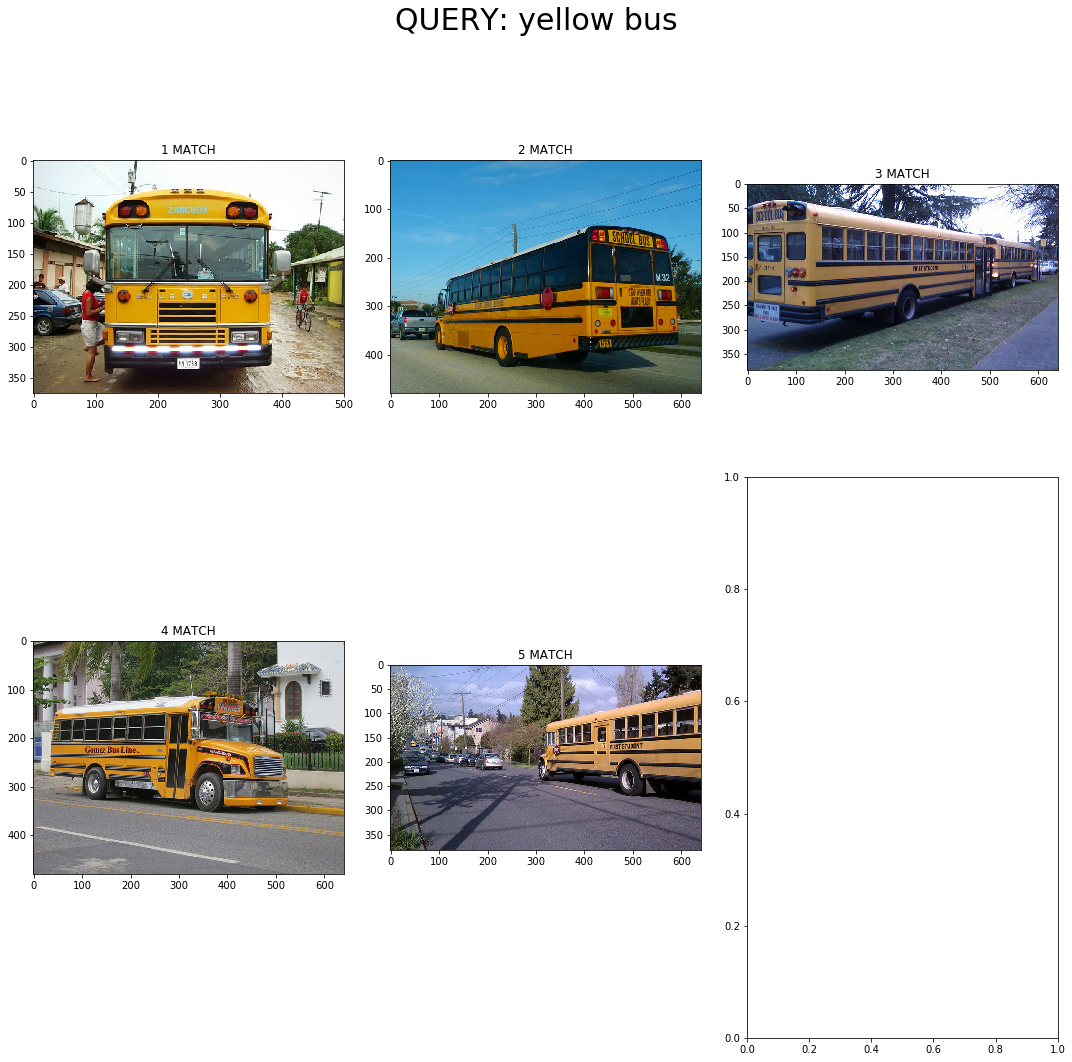

In [158]:
f, ax = plt.subplots(int(5/3) + 1, 3,figsize = (15,15))
f.suptitle('QUERY: {}'.format(query), fontsize=30)

row = 0
column = 0
for i, image in enumerate(selected_images[0]):
    img = plt.imread(image)
    ax[row,column].imshow(img)
    ax[row,column].set_title(str(i+1)+ ' MATCH')
    if column == 2:
        row = row + 1
        column = 0
    else:
        column = column + 1

plt.tight_layout()
plt.show()